In [1]:
import warnings
warnings.filterwarnings('ignore')

import shap
import xgboost as xgb
from sklearn.metrics import *
import sklearn
from sklearn.model_selection import *
import matplotlib.pyplot as plt
import pandas as pd
import lime
import numpy as np

### 1. 
scikit-learn 라이브러리에서 breast_cancer 데이터를 불러와 target_name을 확인해주세요

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

### 2. 
데이터를 훈련 데이터와 평가 데이터로 나누어주세요. 이때 비율은 8:2입니다.

In [3]:
cancer_x = cancer['data']
cancer_y = cancer['target']
x_train, x_validation, y_train, y_validation = train_test_split(cancer_x,cancer_y, train_size=0.8, random_state=17, stratify = cancer_y)

### 3.
훈련 데이터셋을 이용하여 xgboost 모델을 학습시킨 후 평가 데이터셋을 이용하여 accuracy를 측정해주세요

In [4]:
model = xgb.XGBClassifier().fit(x_train, y_train)
y_pred = model.predict(x_validation)
accuracy = accuracy_score(y_validation, y_pred)
accuracy

0.9736842105263158

### 4.
훈련시킨 모델의 feature importance를 bar plot으로 나타내주세요.

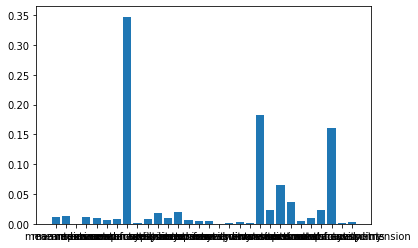

In [5]:
plt.bar(cancer.feature_names, model.feature_importances_)
plt.show()

### 5.
shap이 어떤 식으로 작동하는지 이해한 바를 적어주세요. 그리고 shap이나 lime을 사용할 때는 모델의 성능을 꼭 확인해주어야 하는데, 이 이유도 적어주세요.

Ans :  
i) 변수들의 combination으로 나올 수 있는 모델들로 부터 특정 변수가 들어가 있고 빠져 있는 상태에 따라 달라지는 예측값에 대하여 각기 다른 가중치를 구하여 각 변수의 기여도를 계산함.  
ii) 

### 6.
훈련시킨 모델에 대해 shap 라이브러리의 Explainer 객체를 만들어 주세요. 그리고 평가 데이터셋에 대해 shap values를 계산해 변수에 저장해주세요

In [6]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_validation)

### 7.
shap은 모델의 예측 하나 하나에 대해서 어떤 변수가 예측에 얼마나 영향을 주었는가를 알려줍니다.
첫 번째 테스트 데이터에 대한 shap value를 force plot으로 나타내고 그래프를 해석 해주세요.

In [7]:
shap.initjs()

In [8]:
shap.force_plot(explainer.expected_value, shap_values, x_validation)

feature 7, 26, 13이 대체로 유방암 확률을 높이는 역할을 하고, feature 22, 20, 23, 27이 대체로 유방암 확률을 낮추는 역할을 한다. 

### 8.
개별 예측 하나 하나에 대한 plot으로는 전체 데이터에서 어떤 변수가 의미있는 변수인지 알기 어렵습니다. 그래서 summary plot을 이용하면 전체 데이터에서 중요한 변수를 알 수 있습니다. summary plot을 그린 후 feature importance 그래프와 비교해주시고, summay plot을 해석해주세요

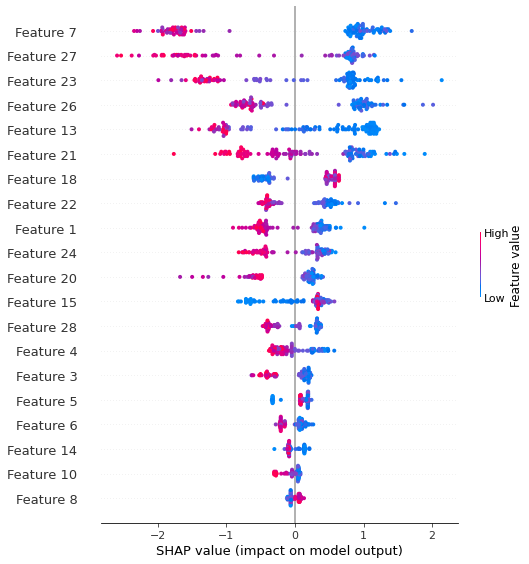

In [9]:
shap.summary_plot(shap_values, x_validation)

위 그래프의 y축에 기재된 features들은 예측에 끼치는 영향력을 맨위를 기준으로 내림차순으로 정렬한 것이다. 대체로 feature values가 낮아야 예측에 긍정적인 영향을 끼치는 것으로 보인다. 

### 9.
훈련 데이터를 사용하여 lime 라이브러리의 LimeTabularExplainer객체를 만들어주세요. feature_names, class_name 파라미터도 함께 채워주세요  
class_names=['malignant', 'benign']

In [11]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(x_train, mode="classification", feature_names= cancer.feature_names, class_names=['malignant', 'benign'])
explainer

### 10.
lime 역시 개별 예측에 대해 모델의 예측에 영향을 준 변수를 알려줍니다. explain_instance 함수를 이용하여 평가 데이터셋 중 하나에 대한 설명을 보여주세요. show_in_notebook 함수를 이용하여 ipynb에서 시각화할 수 있습니다.

In [12]:
i = np.random.randint(0, x_validation.shape[0])
exp = explainer.explain_instance(x_validation[i], model.predict_proba, num_features=2, top_labels=1)

In [13]:
exp.show_in_notebook(show_table=True, show_all=False)

### 11.
lime의 결과를 해석해주세요

### 12.

scikit-learn에서 california housing 데이터를 불러와 훈련 데이터와 평가 데이터로 나누어주세요

In [75]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
boston = load_boston()

In [78]:
X, y = boston.data, boston.target
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=17)

### 13.

XGBRegressor를 이용해 모델을 훈련시킨 후, 평가 데이터에 대한 R2 score를 구해주세요

In [80]:
from xgboost import XGBRegressor, plot_importance
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

0.8360425771984402

### 14.
모델의 feature importance를 bar plot으로 나타내주세요

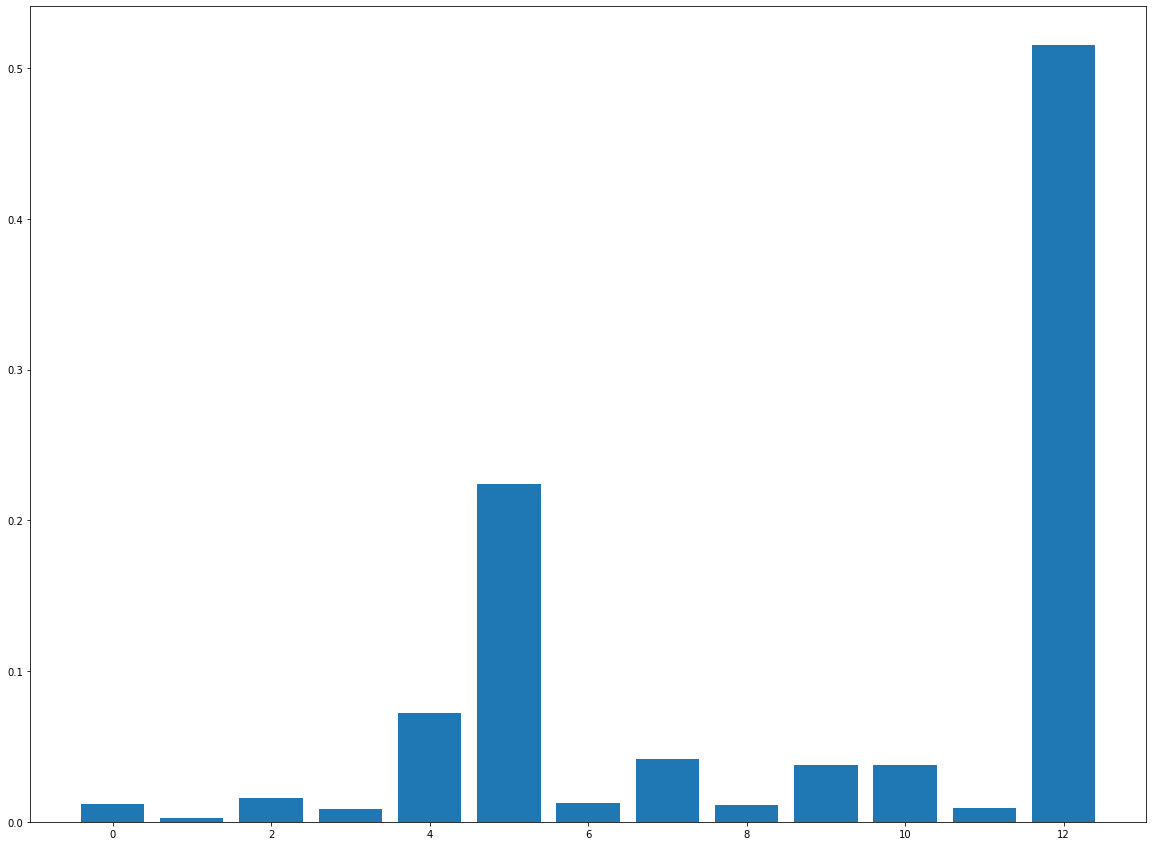

In [94]:
plt.figure(figsize=(20, 15))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

### 15.
평가 데이터셋에 대한 shap value를 summmary plot으로 그려주세요.

In [88]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_validation)

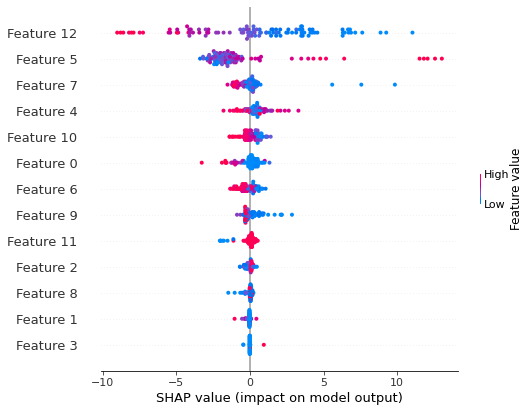

In [ ]:
shap.summary_plot(shap_values, X_validation)

### 15.
feature importance 그래프와 summary plot을 비교해주시고, summary plot을 해석해주세요

영향력이 제일 큰 feature 12,5로 두 그래프 모두 동일하게 나오고, 그 외 짜잘한 영향력을 가진 변수들은 조금씩 다르게 나옴.  
summary plot에 따르면, feature value의 높낮이가 미치는 영향력은 거의 반반인 것 같다.  